<a href="https://colab.research.google.com/github/lalakin99/Particle_Opinion_Dynamics/blob/main/HW2_LalAkin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# *HW 2 NETWORK DYNAMICS AND LEARNING*

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/NDL_LABS

/content/drive/MyDrive/NDL_LABS


In [ ]:
import numpy as np
import scipy as scipy
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline
import cvxpy as cp

# Exercise 1

For the first question, I first constructed the Lambda matrix(transition rates) for the continious time random walk in the given network.  I also computed the fraction of time that will be spent in each node.

In [ ]:
Lambda = [
[0, 2/5, 1/5, 0, 0],
[0, 0, 3/4, 1/4, 0],
[1/2, 0, 0, 1/3, 0],
[0, 0, 1/3, 0, 2/3],
[0, 1/3, 0, 1/3, 0]]

w = np.sum(Lambda, axis=1)
w_star = np.max(w)
P_bar = Lambda/w_star #computing the normalized weight matrix
P_bar = P_bar + np.diag(np.ones(len(w))-np.sum(P_bar,axis=1))

values,vectors = np.linalg.eig(P_bar.T)
index = np.argmax(values.real)
pi_bar = vectors[:,index].real
pi_bar = pi_bar/np.sum(pi_bar)
print("pi_bar=", pi_bar)

nstates = len(pi_bar)

pi_bar= [0.2173913  0.14906832 0.26086957 0.1863354  0.1863354 ]


# 1.a

In [ ]:
iters = 1000 #must be large enough
return_time = np.zeros(iters)
for epoch in range(iters):
    pos = [2] #starting from node b, the index will be 2
    t_times = [0] #this will store the jump times
    t_next = -np.log(np.random.rand())/w_star #the next ticking time is defined by the global poisson clock
    i = 1
    while True:
        pos.append(np.random.choice(nstates, p=P_bar[pos[i-1],:]))
        t_times.append(t_times[i-1] + t_next) #to move from the last node to the next one we jump, and store their times in t_times
        t_next = -np.log(np.random.rand())/w_star
        if pos[i] == 2: #this is set to 2 because we want to calculate the return time back to node b
            break
        else:
            i += 1

    return_time[epoch] = t_times[i]

print('Average return time of node  b =', np.average(return_time))

Average return time of node  b = 3.7916666825333496


# 1.b

In [ ]:
print('Theoretical computation of the average time it takes to come back to node b:', 1 / (w[2] * pi_bar[2])) #the formula given in the lectures to compute return time

Theoretical computation of the average time it takes to come back to node b: 4.599999999999998


# 1.c

In [ ]:
iterss = 1000
hitting_time = np.zeros(iterss)

for epoch in range(iterss):
    at = [0] #we start this time from node o
    t_time = [0]
    t_next = -np.log(np.random.rand())/w_star #formula to compute the next ticking time

    i = 1
    while True:
        at.append(np.random.choice(nstates, p=P_bar[at[i-1],:]))
        t_time.append(t_time[i-1] + t_next)
        # compute the waiting time to the next transition
        t_next = -np.log(np.random.rand())/w_star
        if at[i] == 4: #we end this while true condition when the d node is reached
            break
        else:
            i += 1

    hitting_time[epoch] = t_time[i]

print('Average hitting time of node o to node d:', np.average(hitting_time))

Average hitting time of node o to node d: 11.079065111716563


# 1.d

In [ ]:
S = [4] # referring to node d
R = [node for node in range(nstates) if node not in S] #setting the set R which is the remaining nodes

D = np.diag(w)
P = np.linalg.inv(D) @ Lambda
P_bar = P[np.ix_(R, R)]
x_bar = np.linalg.solve((np.identity(nstates-1) - P_bar), 1/w[np.ix_(R)])

print("Computed hitting time from node o to node d:", x_bar[0])

Computed hitting time from node o to node d: 10.766666666666666


# 1.e

In [ ]:
D = np.diag(w)
P = np.linalg.inv(D) @ Lambda

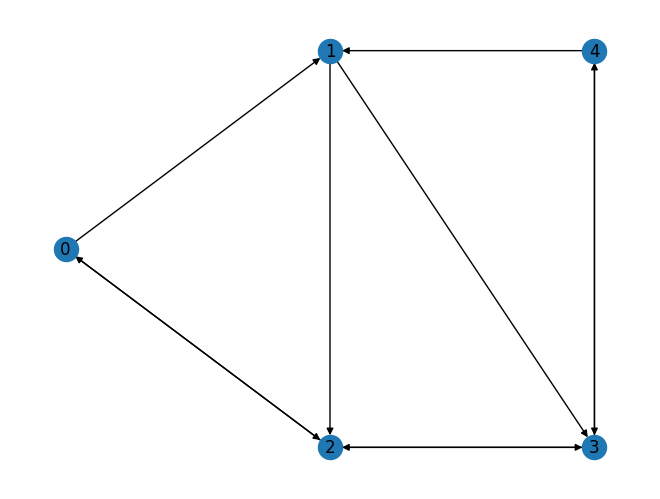

In [ ]:
G = nx.DiGraph()
G.add_edges_from([(0,1),(0,2),(1,2),(1,3),(2,0),(2,3),(3,2),(4,1),(4,3),(3,4)])
n_nodes = len(G)

pos = {0:[-1,0], 1:[0,1], 2:[0,-1], 4:[1,1],3:[1,-1]}
nx.draw(G, pos, with_labels=True)

Is G Aperiodic?  True
Is G Strongly connected?  True


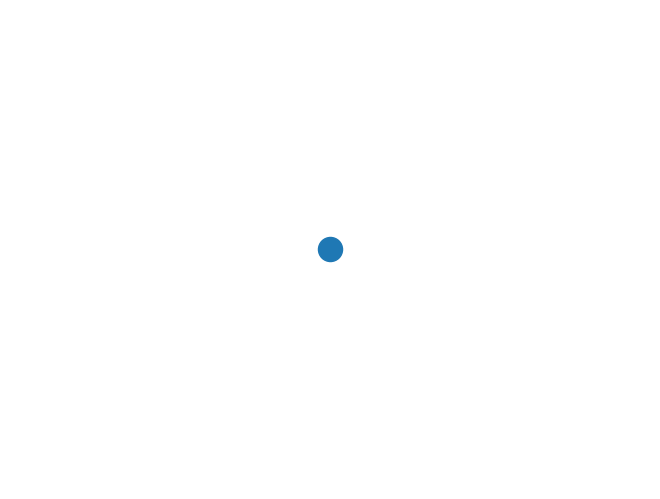

In [ ]:
condensation_graph = nx.algorithms.components.condensation(G)
nx.draw(condensation_graph)
ques = nx.algorithms.dag.is_aperiodic(G)
ques2 =nx.algorithms.is_strongly_connected(G)
print("Is G Aperiodic? ",ques)
print("Is G Strongly connected? ",ques2)

In [ ]:
for iter in range(5):
  x = np.random.rand(5)

  for n in range(100):
      x = P @ x
  print("x(100):", x)

print()

x(100): [0.26357394 0.26357394 0.26357394 0.26357394 0.26357394]
x(100): [0.54984659 0.54984659 0.54984659 0.54984659 0.54984659]
x(100): [0.58008599 0.58008599 0.58008599 0.58008599 0.58008599]
x(100): [0.50938184 0.50938184 0.50938184 0.50938184 0.50938184]
x(100): [0.65046897 0.65046897 0.65046897 0.65046897 0.65046897]



In [ ]:
for n in range(1000):
    x = P @ x
print("x(1000):", x)

x(1000): [0.64602333 0.64602333 0.64602333 0.64602333 0.64602333]


# 1.f

In [ ]:
Lambda = [
[0, 2/5, 1/5, 0, 0],
[0, 0, 3/4, 1/4, 0],
[1/2, 0, 0, 1/3, 0],
[0, 0, 1/3, 0, 2/3],
[0, 1/3, 0, 1/3, 0]]


w = np.sum(Lambda, axis=1)
D = np.diag(w)
P = np.linalg.inv(D) @ Lambda

In [ ]:
for i in range(5):
    x = np.random.rand(5)
    print('x(0) =', x.round(2))

    for j in range(100):
        x = P @ x
    print('x(100) =', x.round(2))
    print()

x(0) = [0.76 0.94 0.63 0.16 0.56]
x(100) = [0.59 0.59 0.59 0.59 0.59]

x(0) = [0.48 0.19 0.12 0.15 0.08]
x(100) = [0.19 0.19 0.19 0.19 0.19]

x(0) = [0.69 0.06 0.23 0.17 0.22]
x(100) = [0.26 0.26 0.26 0.26 0.26]

x(0) = [0.56 0.21 0.94 0.78 0.13]
x(100) = [0.58 0.58 0.58 0.58 0.58]

x(0) = [0.61 0.39 0.12 0.99 0.64]
x(100) = [0.53 0.53 0.53 0.53 0.53]



In [ ]:
alfa_err = np.zeros(300)

#running the simulation for 300 times
for i in range(300): # .rand returns uniformly random and independent values
    x = np.random.rand(5) #because we have 5 nodes
    for n in range(5):
        x = P @ x

    alfa_err[i] = (1 - np.mean(x))*(1 - np.mean(x)) #calculation of the variance in form of the distance of each data point from the mean, squared

print("Variance of the nodes:", 7/5) #average variance of the system by Law of Large Numbers as the iterations of simulations approach a big n
#(Var(o+a+b+c+d)=Var(o)+Var(a)+Var(b)+Var(c)+Var(d)=1+1+1+2+2=7 (these are random variables, and independent as said in lecture notes)
#Since we simulate for 300 times it is large enough (>>30) we can say the variance will be Var(all)/n = 7/5 = 1.4)
print("Variance of the consensus state:", np.mean(alfa_err),"\n")
#to find the variance of the consensus, we have to divide the general variance by n

Variance of the node states: 1.4
Variance of the consensus state: 0.2597437865869774 



# 1.g

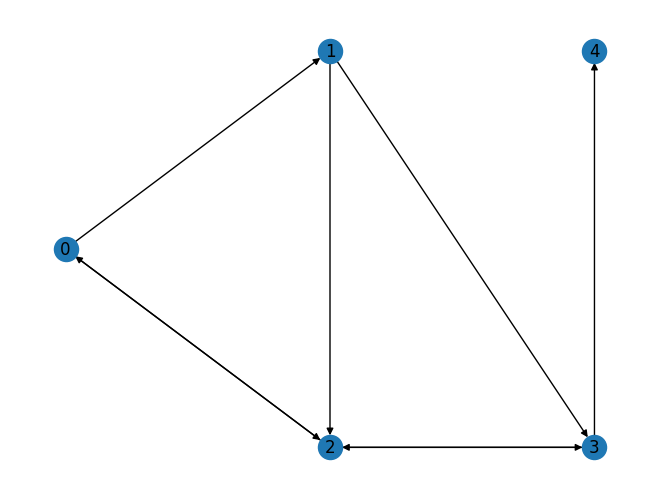

In [ ]:
G2 = G.copy()
G2.remove_edges_from([(4, 1), (4, 3)])
nx.draw(G2, pos, with_labels=True)

Is G Aperiodic?  True


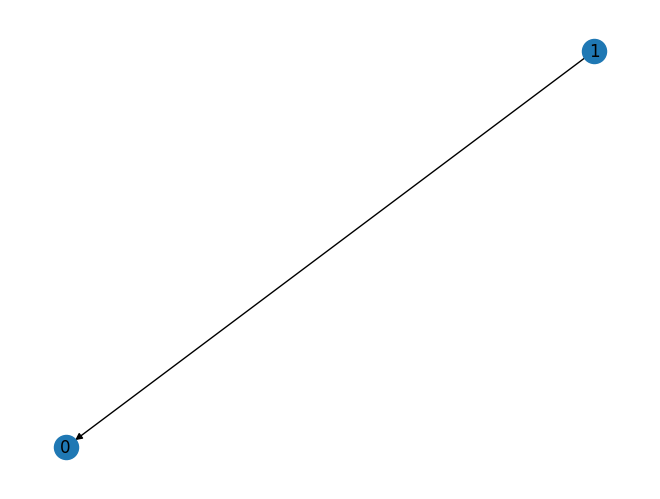

In [ ]:
condensation_graphhh = nx.algorithms.condensation(G2)
nx.draw(condensation_graphhh,with_labels=True)
quesss = nx.algorithms.is_aperiodic(G2)
print("Is G Aperiodic? ",quesss)

In [ ]:
condensation_graphhh.graph['mapping']

{4: 0, 0: 1, 1: 1, 2: 1, 3: 1}

In [ ]:
Lambda_g = [
[0, 2/5, 1/5, 0, 0],
[0, 0, 3/4, 1/4, 0],
[1/2, 0, 0, 1/3, 0],
[0, 0, 1/3, 0, 2/3],
[0, 0, 0, 0, 1]]

w = np.sum(Lambda_g, axis=1)
w_star = np.max(w)
P_bar = Lambda_g/w_star #computing the normalized weight matrix
P_bar = P_bar + np.diag(np.ones(len(w))-np.sum(P_bar,axis=1))

values,vectors = np.linalg.eig(P_bar.T)
index = np.argmax(values.real)
pi_bar = vectors[:,index].real
pi_bar = pi_bar/np.sum(pi_bar) #computing the invariant distrbutions of each node
print("pi_bar=", pi_bar)

nstates = len(pi_bar)

pi_bar= [0. 0. 0. 0. 1.]


In [ ]:
D = np.diag(w)
P = np.linalg.inv(D) @ Lambda_g

In [ ]:
for i in range(5):
    x = np.random.rand(5)
    print('x(0):', x)

    for f in range(100):
        x = P @ x
    print('x(100):', x)
    print()

x(0): [0.09542885 0.40074667 0.07698435 0.80426287 0.85312611]
x(100): [0.85312601 0.85312602 0.85312602 0.85312608 0.85312611]

x(0): [0.0417767  0.6848813  0.15306808 0.3877935  0.64912592]
x(100): [0.64912585 0.64912586 0.64912586 0.6491259  0.64912592]

x(0): [0.09204415 0.62284914 0.25539777 0.90563579 0.59719422]
x(100): [0.59719418 0.59719419 0.59719419 0.59719421 0.59719422]

x(0): [0.47237394 0.3551823  0.68437145 0.18976488 0.15933706]
x(100): [0.15933711 0.15933711 0.15933711 0.15933708 0.15933706]

x(0): [0.96876474 0.763366   0.17154695 0.78136017 0.5075661 ]
x(100): [0.50756612 0.50756612 0.50756612 0.50756611 0.5075661 ]



Since there is one sink in the condensation graph we reach a consensus value only dependent on the x(0) value of node d.

In [ ]:
alfa_err = np.zeros(200) #running the simulation for 200 times

for i in range(200): # .rand returns uniformly random values in [0,1], thus mean of uniform dist = 1/2
    x = np.random.rand(5) #because we have 5 nodes
    for n in range(5):
        x = P @ x
    alfa_err[i] = (1/2 - np.mean(x))*(1/2 - np.mean(x)) #calculation of the variance in form of the distance of each data point from the mean, squared

print("Variance of the node states:", 1/12) #variance of uniform dist. hence each node
print("Variance of the consensus:", np.mean(alfa_err), "\n") #to find the variance of the consensus, we have to divide the general variance by n

Variance of the node states: 0.08333333333333333
Variance of the consensus: 0.0371572331285053 



# 1.h

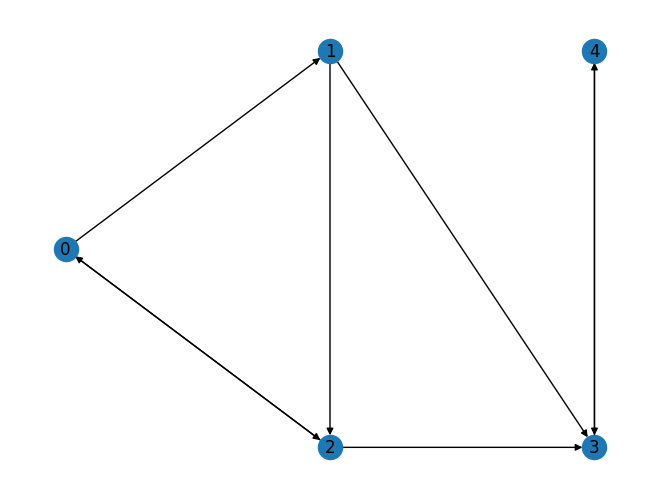

In [ ]:
G3 = G.copy()
G3.remove_edges_from([(3,2),(4,1)])
nx.draw(G3, pos, with_labels=True)

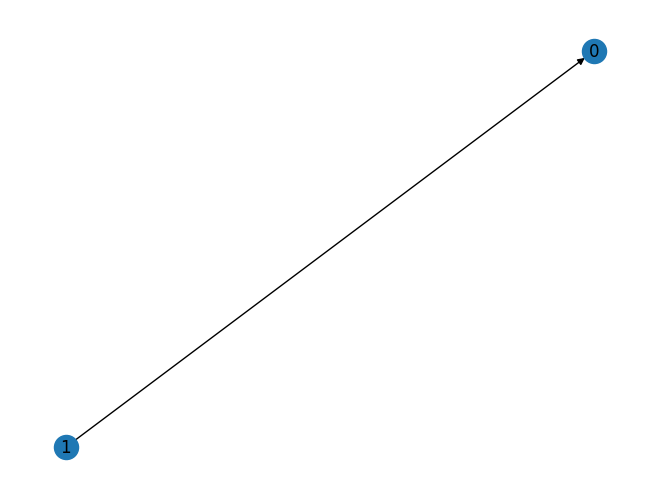

In [ ]:
condensation_graph = nx.algorithms.components.condensation(G3)
nx.draw(condensation_graph,with_labels=True)

In [ ]:
quess = nx.algorithms.dag.is_aperiodic(G3)
quess2 =nx.algorithms.is_strongly_connected(G3)
print("Is G Aperiodic? ",quess)
print("Is G Strongly connected? ",quess2)

Is G Aperiodic?  True
Is G Strongly connected?  False


This graph is not strongly connected. Since we have only one sink in the condensation graph, the consensus requirements are reached.

In [ ]:
Lambda_h = np.array([
    [0, 2/5, 1/5, 0, 0],
    [0, 0, 3/4, 1/4, 0],
    [1/2, 0, 0, 1/3, 0],
    [0, 0, 0, 0, 2/3],
    [0, 0, 0, 1/3, 0]
])

degrees = np.sum(Lambda_h,axis=1)
D = np.diag(degrees)
P = np.linalg.inv(D) @ Lambda_h

In [ ]:
values,vectors = np.linalg.eig(P.T)
index = np.argmax(values.real)
pi = vectors[:,index].real
pi = pi/np.sum(pi)
print("pi=", pi.round(2))

pi= [-0.  -0.  -0.   0.5  0.5]


In [ ]:
for i in range(5):
    x = np.random.rand(5)
    print('x(i)', x)

    for f in range(100):
        x = P @ x
    print('x(100) =', x)

    x = P @ x
    print('x(101) =', x)
    print()

x(i) [0.24446894 0.74588761 0.4696058  0.53988054 0.50415473]
x(100) = [0.52364154 0.52364154 0.51389813 0.53988054 0.50415473]
x(101) = [0.52039374 0.52039374 0.53013714 0.50415473 0.53988054]

x(i) [0.53557593 0.70761981 0.18913833 0.24423612 0.26661545]
x(100) = [0.25440854 0.25440854 0.26051199 0.24423612 0.26661545]
x(101) = [0.25644303 0.25644303 0.25033957 0.26661545 0.24423612]

x(i) [0.69442042 0.90289493 0.58188617 0.92973974 0.75278392]
x(100) = [0.84930528 0.84930528 0.8010446  0.92973974 0.75278392]
x(101) = [0.83321838 0.83321838 0.88147906 0.75278392 0.92973974]

x(i) [0.48687058 0.29484984 0.84473423 0.93691699 0.53458962]
x(100) = [0.75404092 0.75404092 0.64431527 0.93691699 0.53458962]
x(101) = [0.7174657  0.7174657  0.82719135 0.53458962 0.93691699]

x(i) [0.36042042 0.72224736 0.2655746  0.65665846 0.6845159 ]
x(100) = [0.66932093 0.66932093 0.67691841 0.65665846 0.6845159 ]
x(101) = [0.67185343 0.67185343 0.66425595 0.6845159  0.65665846]



As it seems there is no consensus value, the first two nodes reach their own local agreement but the rest can't.

# Exercise 2

In [ ]:
Lambda_2 = [
[0, 2/5, 1/5, 0, 0],
[0, 0, 3/4, 1/4, 0],
[1/2, 0, 0, 1/3, 0],
[0, 0, 1/3, 0, 2/3],
[0, 1/3, 0, 1/3, 0]]

w = np.sum(Lambda_2, axis=1)
w_star = np.max(w)
P_bar = Lambda_2/w_star #computing the normalized weight matrix
P_bar = P_bar + np.diag(np.ones(len(w))-np.sum(P_bar,axis=1))

values,vectors = np.linalg.eig(P_bar.T)
index = np.argmax(values.real)
pi_bar = vectors[:,index].real
pi_bar = pi_bar/np.sum(pi_bar)

nstates = len(pi_bar)
print("pi_bar:", pi_bar)

pi_bar: [0.2173913  0.14906832 0.26086957 0.1863354  0.1863354 ]


# 2.a

In [ ]:
n_particles = 100 #100 particles are in the network
current_particles = np.array(range(n_particles)) #active particles will be the ones who are moving
node_pos = np.array([2] * n_particles) #beginning from node b, the current position for the particles are kept here
first_transition_times = np.zeros(n_particles)
return_time = np.zeros(n_particles)
ticks = [0]

iteration_count = 1
while current_particles.size > 0:

    t_next = -np.log(np.random.rand())/100 #global poisson clock with rate = 100
    ticks.append(t_next)

    selected_particle = np.random.choice(range(n_particles)) #randomly choosing one particle with each tick

    if selected_particle in current_particles:
        node_pos[selected_particle] = np.random.choice(nstates, p=P_bar[node_pos[selected_particle],:]) #the selected particle to jump will go to the next node
        if first_transition_times[selected_particle] == 0:
            first_transition_times[selected_particle] = iteration_count

        if node_pos[selected_particle] == 2: #stopping condition
            return_time[selected_particle] = sum(ticks[int(first_transition_times[selected_particle]): -1])
            current_particles = np.delete(current_particles, np.where(current_particles == selected_particle)) #when one node reaches the node b, it is no longer active

    iteration_count += 1

print('Average return time of node b:', np.average(return_time))

Average return time of node b: 3.2460060246527345


# 2.b

In [ ]:
epochs = 10
n_particles = 100
n_time_units = 60
results = np.zeros((epochs, nstates))

for epoch in range(epochs):
    p_nodes = [[0] * nstates]
    p_nodes[0][0] = n_particles
    transition_times = [0.0]

    while transition_times[-1] <= 60.0:
        t_next = -np.log(np.random.rand()) / n_particles
        transition_times.append(transition_times[-1] + t_next)

        p_jump = np.array(p_nodes[-1]) / n_particles
        prev_node = np.random.choice(nstates, p=p_jump)
        next_node = np.random.choice(nstates, p=P_bar[prev_node,:])

        p_nodes.append(p_nodes[-1][:])

        p_nodes[-1][prev_node] -= 1
        p_nodes[-1][next_node] += 1

    results[epoch, :] = p_nodes[-1][:]

print('Average number of particles in each node in the end of 60 time units (normalized):', (np.average(results, axis=0) / n_particles)*100)

Average number of particles in each node in the end of 60 time units : [23.4 15.1 24.9 18.6 18. ]


In [ ]:
print("pi_bar:", pi_bar)

pi_bar: [0.2173913  0.14906832 0.26086957 0.1863354  0.1863354 ]


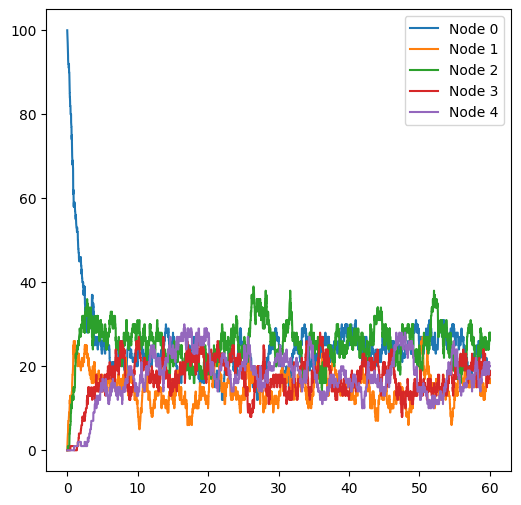

In [ ]:
plt.figure(figsize=(4, 4))
for node in range(nstates):
    path = np.array(p_nodes)[:, node]
    plt.plot(transition_times, path, label='Node {0:d}'.format(node))
    plt.title('Trajectory of 100 particles for 60 time units')
plt.legend()

# Exercise 3

In [ ]:
Lambda_3 = [ #changing the transition rate matrix from the first two exercises
[0, 3/4, 3/4, 0, 0],
[0, 0, 1/4, 1/4, 2/4],
[0, 0, 0, 1, 0],
[0, 0, 0, 0, 1],
[0, 0, 0, 0, 1]] #a self loop in d since it has 2 incoming links we can also see this network has d, or node 4 as a stubborn node

w = np.sum(Lambda_3, axis=1)
w_star = np.max(w)
P_bar = Lambda_3/w_star
P_bar = P_bar + np.diag(np.ones(len(w))-np.sum(P_bar,axis=1))

values,vectors = np.linalg.eig(P_bar.T)
index = np.argmax(values.real)
pi_bar = vectors[:,index].real
pi_bar = pi_bar/np.sum(pi_bar)
print("pi_bar=", pi_bar)

nstates = len(pi_bar)

pi_bar= [0. 0. 0. 0. 1.]


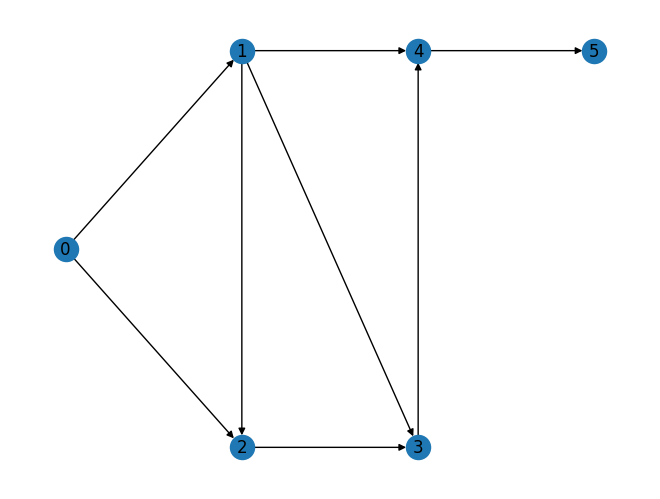

In [ ]:
G_3 = nx.DiGraph()
G_3.add_edges_from([(0,1),(0,2),(1,2),(1,3),(1,4),(2,3),(3,4),(4,5)])
n_nodes = len(G_3)

pos = {0:[-1,0], 1:[0,1], 2:[0,-1], 4:[1,1],3:[1,-1],5:[2,1]}
nx.draw(G_3, pos, with_labels=True)

In [ ]:
question = nx.algorithms.dag.is_aperiodic(G_3)
question2 =nx.algorithms.is_strongly_connected(G_3)
print("Is G Aperiodic? ",question)
print("Is G Strongly connected? ",question2)

Is G Aperiodic?  True
Is G Strongly connected?  False
